# Introduction to Machine Learning

Author: Craig Wilcox

Link to GitHub repository: https://github.com/s256657/datafun-07-ml

Purpose: This project will introduce machine learning be working through simple linear regression which is a type os supervised learning. We will build a model, make predeictions, visualize the data, then publish insights. This should be used for introduction and learning.

In [15]:
# Import dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jupyterlab
import pyarrow
from scipy import stats


# Load Dataset
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## Part 1 - Chart a Straight Line

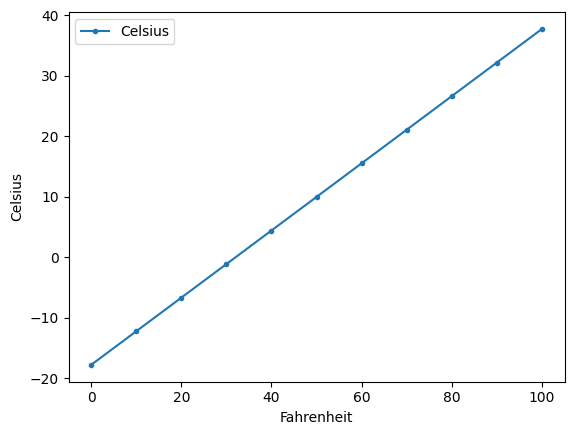

In [16]:
# Create a chart using a simple linear regression equation

c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

This is a simple straight line chart showing the relationship between Fahrenheit and Celcius temperatures.

## Part 2 - Prediction

1. Data Aquired previously with dependencies
2. Data Inspection
3. Data Cleaning
4. Descriptive Statistics
5. Build Model
6. Predict
7. Visualizations

### Data Inspection

In [17]:

nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [18]:
# Data inspection tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Clean Data

In [19]:

nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [20]:
nyc_df.Date.dtype

dtype('int64')

In [21]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [22]:
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Descriptive Statistics

In [23]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Build Model

In [24]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [25]:
linear_regression.slope

np.float64(0.014771361132966163)

In [26]:
linear_regression.intercept

np.float64(8.694993233674289)

In [27]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [28]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

### Predict
High temperature for 2024

In [29]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Visualization

(10.0, 70.0)

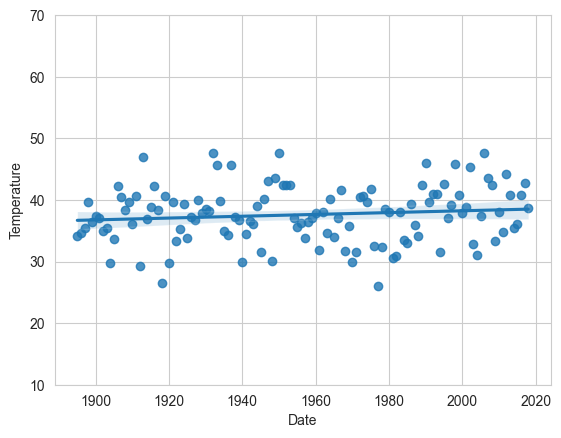

In [30]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)